In [39]:
import numpy as np
from pulp import *
from matplotlib import pyplot as plt

In [40]:
n =  5 # No. of patients
m =  6 # No. of potential ambulance locations
p =  6 # Total no. of facilities

# let's make this reproducible
np.random.seed(0)

# Generate random values for the time matrix
t = np.random.randint(low=1, high=60, size=(n, p))
print(t)

[[45 48 54  1  4  4]
 [40 10 20 22 51 37]
 [24  7 25 25 13 59]
 [ 2 39 40 24 47 25]
 [18 38 26 14  9 10]]


In [44]:
def MILP(n, m, p, show_t = True, seed_val = 0):
    seed = seed_val
    # let's make this reproducible
    np.random.seed(seed_val)

    # Generate random values for the time matrix
    t = np.random.randint(low=1, high=60, size=(n, p))
    if show_t:
        print('t:')
        print(t)
    
    prob = LpProblem("Facility Location Problem", LpMinimize)

    # DVs
    x = LpVariable.dicts("x", [(i, j) for i in range(1, n + 1) for j in range(1, p + 1)], 0, 1, LpBinary)
    a = LpVariable.dicts("a", range(1, m + 1), 0, 1, LpBinary)

    # objective
    prob += lpSum(t[i][j] * x[(i+1, j+1)] for i in range(n) for j in range(p))

    # constraints
    for i in range(n):
        prob += lpSum(x[(i+1, j+1)] for j in range(p)) == 1

    for i in range(n):
        for j in range(p):
            prob += x[(i+1, j+1)] <= a[j+1]

    prob += lpSum(a[j+1] for j in range(m)) <= p

    # Solve
    prob.solve()

    #if LpStatus[prob.status] == "Optimal":
        #print("This is optimal Solution with objective value ", value(prob.objective))

    # Create an empty list to store the variable values
    a_values = np.zeros(m)
    x_values = np.zeros(n * p)

    # Store the variable values in the list
    i = 0
    for v in prob.variables():
        if 'a' in v.name:
            a_values[i] = v.varValue
        elif 'x' in v.name:
            x_values[i - m] = v.varValue
        i = i + 1
    x_values = x_values.reshape(n,p)
    #print('a:')
    #print(a_values)
    #print('x:')
    #print(x_values)
    
    # Generate random values for comparison
    np.random.seed(seed)
    random_a = np.random.randint(low=0, high=2, size=m)
    random_x = np.random.randint(low=0, high=2, size=(n, p))
    
    random_objective = np.sum(t * random_x)

    return a_values, random_a, value(prob.objective), random_objective

In [45]:
MILP(20, 25, 12, False)

(array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 1., 1.]),
 array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0]),
 72.0,
 3527)

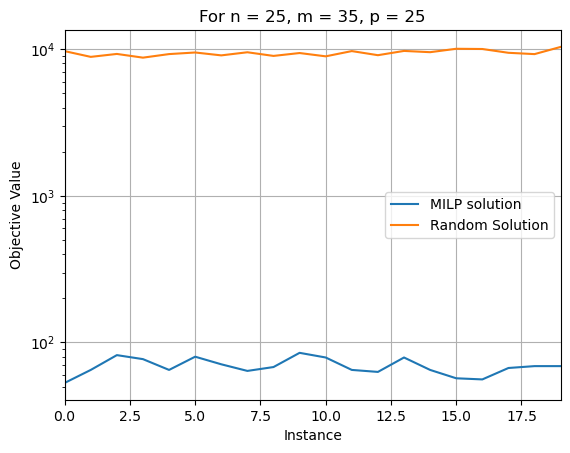

In [113]:
num_instances = 20
n = 25
m = 35
p = 25
seed = 0

milp_objectives = []
random_objectives = []
difference = []

for i in range(num_instances):
    milp_a, rand_a, milp_obj, rand_obj = MILP(n, m, p, False, seed + i)
    
    diff = abs(milp_obj - rand_obj)
    milp_objectives.append(milp_obj)
    random_objectives.append(rand_obj)
    difference.append(diff)
    

plt.title("For n = 25, m = 35, p = 25")
plt.plot(milp_objectives, label = 'MILP solution')
plt.plot(random_objectives, label = "Random Solution")
plt.xlabel("Instance")
plt.ylabel("Objective Value")
plt.xlim(0, num_instances - 1)
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.legend()
plt.grid()

In [118]:
%%time 
MILP(1000,1000,1000, False, 1)

CPU times: total: 52.5 s
Wall time: 2min 39s


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

In [119]:
MILP(1000,1000,1000, False, 0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

In [78]:
def compare_MILP_results(n, m_list, p_list):
    results = []

    for m in m_list:
        for p in p_list:
            if m >= p >= n:
                milp_a, rand_a, milp_obj, rand_obj = MILP(n, m, p, False)

                result = {
                    'm': m,
                    'p': p,
                    #'MILP_solution': milp_a,
                    #'random_solution': rand_a,
                    'MILP_objective': milp_obj,
                    'random_objective': rand_obj
                }

                results.append(result)

    return results

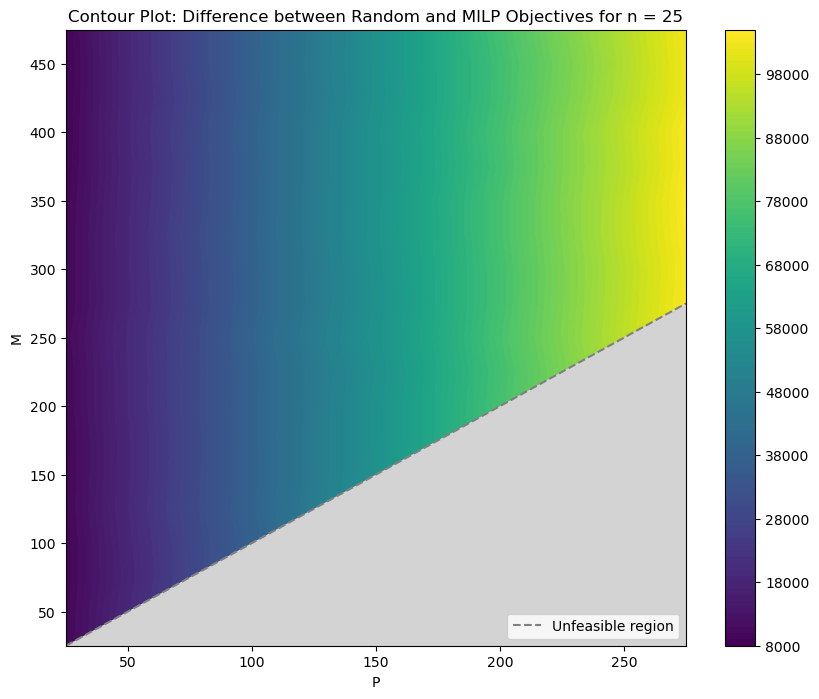

CPU times: total: 17.1 s
Wall time: 35.3 s


In [183]:
%%time

n = 25
ml = np.arange(n, 500, 25)
pl = np.arange(n, 300, 25)

data = compare_MILP_results(n, ml, pl)
# Extract data
m_values = sorted(list(set(item['m'] for item in data)))
p_values = sorted(list(set(item['p'] for item in data)))

random_objectives = np.empty((len(m_values), len(p_values)))
milp_objectives = np.empty((len(m_values), len(p_values)))

for i, m in enumerate(m_values):
    for j, p in enumerate(p_values):
        matching_items = [item for item in data if item['m'] == m and item['p'] == p]
        if matching_items:
            random_objectives[i, j] = matching_items[0]['random_objective']
            milp_objectives[i, j] = matching_items[0]['MILP_objective']
        else:
            random_objectives[i, j] = np.nan
            milp_objectives[i, j] = np.nan

# Compute the difference between random and MILP objectives
diff_objectives = random_objectives - milp_objectives


# plotting prep
p, m = np.meshgrid(p_values, m_values)

# Plot!
plt.figure(figsize=(10, 8))
plt.contourf(p, m, diff_objectives, levels=100)
plt.fill_between(p_values, p_values, np.min(m_values), color='lightgray')
plt.plot(p_values, p_values, color='gray', linestyle='--', label = "Unfeasible region")
plt.colorbar()
plt.xlabel('P')
plt.ylabel('M')
plt.legend(loc='lower right')
plt.title('Contour Plot: Difference between Random and MILP Objectives for n = 25')
plt.show()

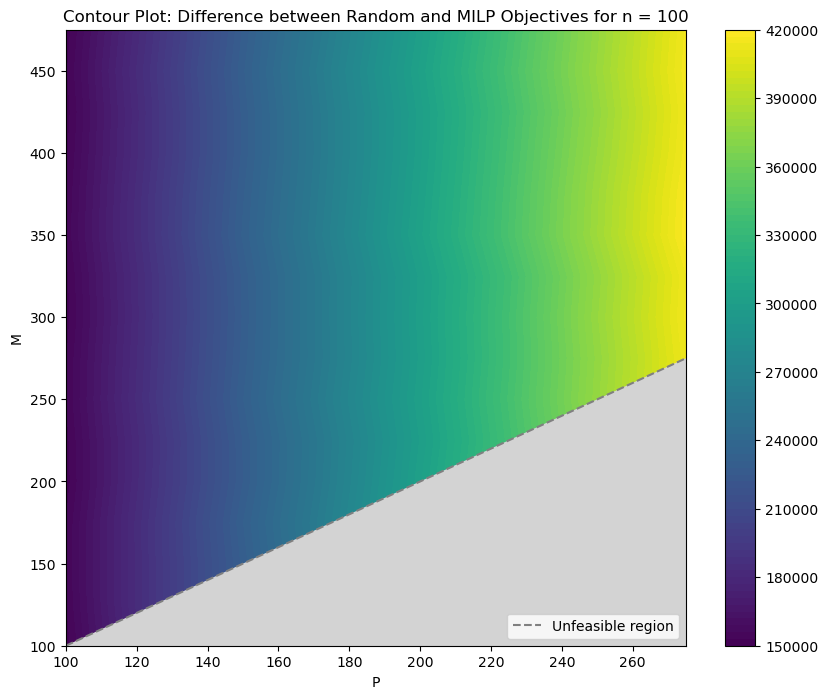

In [181]:
n = 100
ml = np.arange(n, 500, 25)
pl = np.arange(n, 300, 25)

data = compare_MILP_results(n, ml, pl)
# Extract data
m_values = sorted(list(set(item['m'] for item in data)))
p_values = sorted(list(set(item['p'] for item in data)))

random_objectives = np.empty((len(m_values), len(p_values)))
milp_objectives = np.empty((len(m_values), len(p_values)))

for i, m in enumerate(m_values):
    for j, p in enumerate(p_values):
        matching_items = [item for item in data if item['m'] == m and item['p'] == p]
        if matching_items:
            random_objectives[i, j] = matching_items[0]['random_objective']
            milp_objectives[i, j] = matching_items[0]['MILP_objective']
        else:
            random_objectives[i, j] = np.nan
            milp_objectives[i, j] = np.nan

diff_objectives = random_objectives - milp_objectives

p, m = np.meshgrid(p_values, m_values)

plt.figure(figsize=(10, 8))
plt.contourf(p, m, diff_objectives, levels=100)
plt.fill_between(p_values, p_values, np.min(m_values), color='lightgray')
plt.plot(p_values, p_values, color='gray', linestyle='--', label = "Unfeasible region")
plt.colorbar()
plt.xlabel('P')
plt.ylabel('M')
plt.legend(loc='lower right')
plt.title('Contour Plot: Difference between Random and MILP Objectives for n = 100')
plt.show()

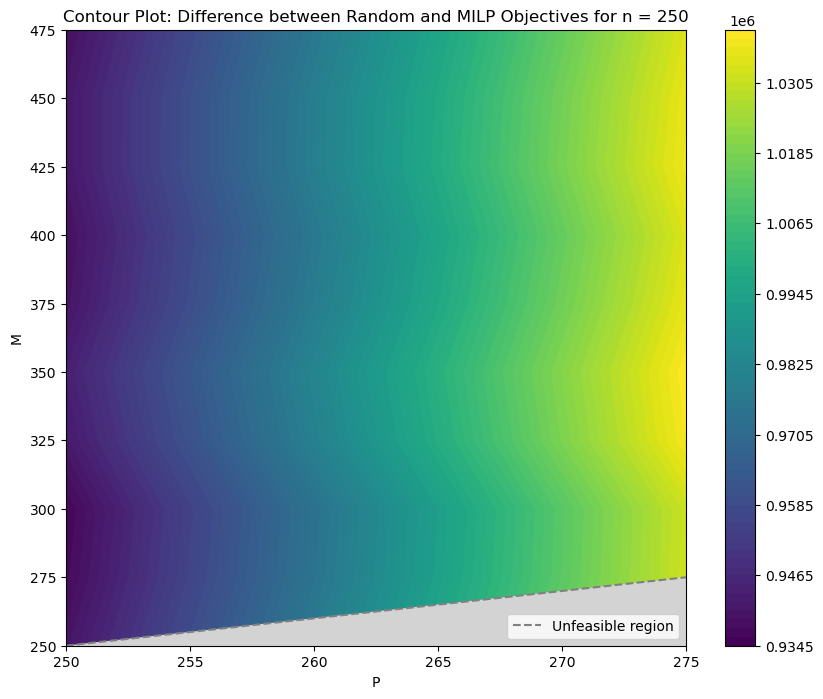

In [179]:
n = 250
ml = np.arange(n, 500, 25)
pl = np.arange(n, 300, 25)

data = compare_MILP_results(n, ml, pl)
# Extract data
m_values = sorted(list(set(item['m'] for item in data)))
p_values = sorted(list(set(item['p'] for item in data)))

random_objectives = np.empty((len(m_values), len(p_values)))
milp_objectives = np.empty((len(m_values), len(p_values)))

for i, m in enumerate(m_values):
    for j, p in enumerate(p_values):
        matching_items = [item for item in data if item['m'] == m and item['p'] == p]
        if matching_items:
            random_objectives[i, j] = matching_items[0]['random_objective']
            milp_objectives[i, j] = matching_items[0]['MILP_objective']
        else:
            random_objectives[i, j] = np.nan
            milp_objectives[i, j] = np.nan

diff_objectives = random_objectives - milp_objectives

#plotting
p, m = np.meshgrid(p_values, m_values)
plt.figure(figsize=(10, 8))
plt.contourf(p, m, diff_objectives)
plt.fill_between(p_values, p_values, np.min(m_values), color='lightgray')
plt.plot(p_values, p_values, color='gray', linestyle='--', label = "Unfeasible region")
plt.colorbar()
plt.xlabel('P')
plt.ylabel('M')
plt.legend(loc='lower right')
plt.title('Contour Plot: Difference between Random and MILP Objectives for n = 250')
plt.show()

In [133]:
def MOO_MILP(n, m, p, show_t=True, seed_val=0):
    seed = seed_val
    np.random.seed(seed)

    # Generate random values for the time matrix
    t = np.random.randint(low=1, high=60, size=(n, p))
    
    prob = LpProblem("Multi-Objective Facility Location Problem", LpMinimize)

    # Decision variables
    x = LpVariable.dicts("x", [(i, j) for i in range(1, n + 1) for j in range(1, p + 1)], 0, 1, LpBinary)
    a = LpVariable.dicts("a", range(1, m + 1), 0, 1, LpBinary)

    # Objective functions
    prob += lpSum(t[i-1][j-1] * x[(i, j)] for i in range(1, n + 1) for j in range(1, p + 1)), "Objective 1"
    prob += lpSum(a[j] for j in range(1, m + 1)), "Objective 2"

    # Constraints
    for i in range(1, n + 1):
        prob += lpSum(x[(i, j)] for j in range(1, p + 1)) == 1

    for i in range(1, n + 1):
        for j in range(1, p + 1):
            prob += x[(i, j)] <= a[j]

    prob += lpSum(a[j] for j in range(1, m + 1)) <= p

    # Solve the problem
    prob.solve()

    # Create empty lists to store the variable values
    a_values = np.zeros(m)
    x_values = np.zeros(n * p)

    # Store the variable values in the lists
    i = 0
    for v in prob.variables():
        if 'a' in v.name:
            a_values[i] = v.varValue
        elif 'x' in v.name:
            x_values[i - m] = v.varValue
        i += 1
    x_values = x_values.reshape(n, p)

    # Generate random values for comparison
    np.random.seed(seed)
    random_a = np.random.randint(low=0, high=2, size=m)
    random_x = np.random.randint(low=0, high=2, size=(n, p))
    random_objective1 = np.sum(t * random_x)
    random_objective2 = np.sum(random_a)

    return (value(prob.objective), value(prob.objective)), (random_objective1, random_objective2)


In [174]:
def compare_MOO_MILP_results(n, m_list, p_list):
    results = []

    for m in m_list:
        for p in p_list:
            if m >= p >= n:
                MOO_milp_objs, MOO_rand_objs = MOO_MILP(n, m, p, False)

                result = {
                    'm': m,
                    'p': p,
                    'difference_1': abs(MOO_milp_objs[0] - MOO_rand_objs[0]),
                    'difference_ 2': abs(MOO_milp_objs[1] - MOO_rand_objs[1])
                }

                results.append(result)

    return results

In [200]:
n = 25
ml = np.arange(n, 500, 25)
pl = np.arange(n, 300, 25)

data1 = compare_MOO_MILP_results(n, ml, pl)

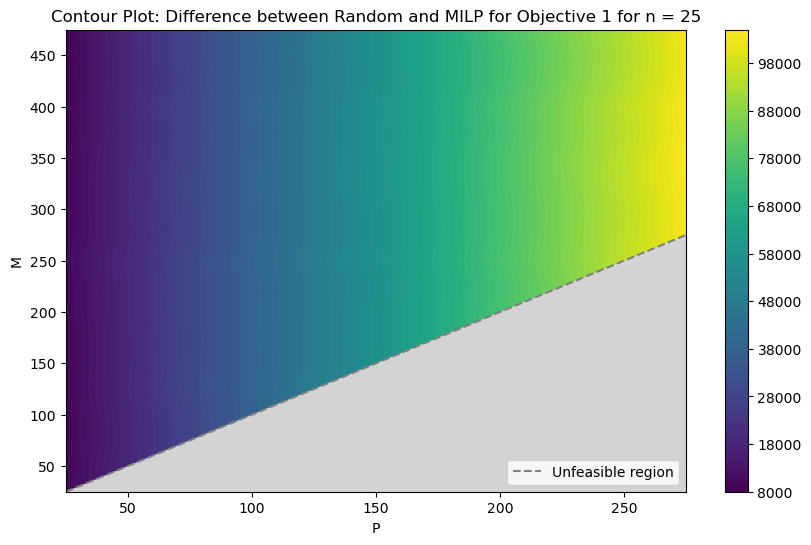

In [201]:
m_values = sorted(list(set(item['m'] for item in data1)))
p_values = sorted(list(set(item['p'] for item in data1)))

difference_1_values = np.empty((len(m_values), len(p_values)))

for i, m in enumerate(m_values):
    for j, p in enumerate(p_values):
        matching_items = [item for item in data1 if item['m'] == m and item['p'] == p]
        if matching_items:
            difference_1_values[i, j] = matching_items[0]['difference_1']
        else:
            difference_1_values[i, j] = np.nan
            
# Plotting preparation
p, m = np.meshgrid(p_values, m_values)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(p, m, difference_1_values,  levels=100)
plt.colorbar(contour)
plt.fill_between(p_values, p_values, np.min(m_values), color='lightgray')
plt.plot(p_values, p_values, color='gray', linestyle='--', label = "Unfeasible region")
plt.colorbar()
plt.xlabel('P')
plt.ylabel('M')
plt.legend(loc='lower right')
plt.title('Contour Plot: Difference between Random and MILP for Objective 1 for n = 25')
plt.show()

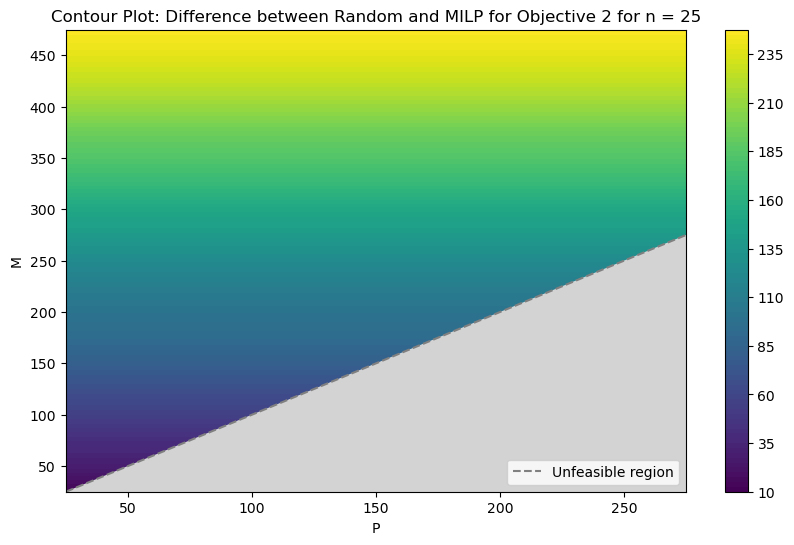

In [202]:
m_values = sorted(list(set(item['m'] for item in data1)))
p_values = sorted(list(set(item['p'] for item in data1)))

difference_2_values = np.empty((len(m_values), len(p_values)))

for i, m in enumerate(m_values):
    for j, p in enumerate(p_values):
        matching_items = [item for item in data1 if item['m'] == m and item['p'] == p]
        if matching_items:
            difference_2_values[i, j] = matching_items[0]['difference_ 2']
        else:
            difference_2_values[i, j] = np.nan
            
# Plotting preparation
p, m = np.meshgrid(p_values, m_values)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(p, m, difference_2_values,  levels=100)
plt.colorbar(contour)
plt.fill_between(p_values, p_values, np.min(m_values), color='lightgray')
plt.plot(p_values, p_values, color='gray', linestyle='--', label = "Unfeasible region")
plt.colorbar()
plt.xlabel('P')
plt.ylabel('M')
plt.legend(loc='lower right')
plt.title('Contour Plot: Difference between Random and MILP for Objective 2 for n = 25')
plt.show()

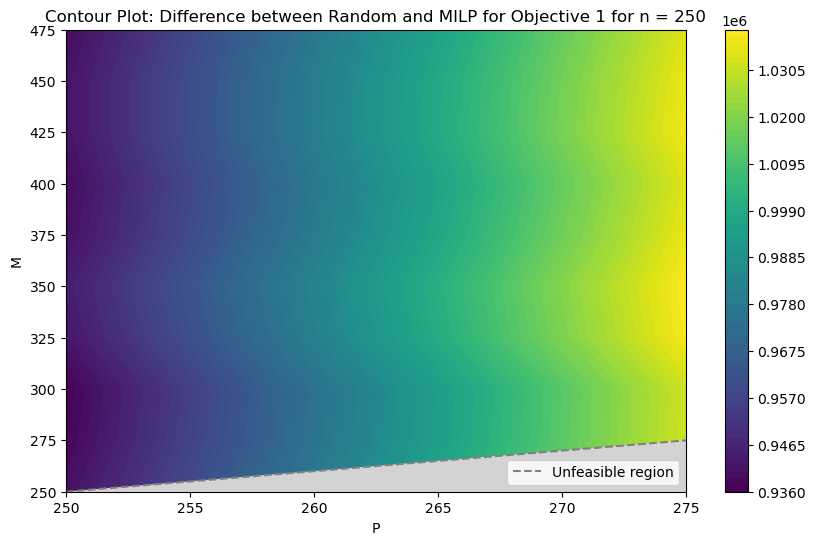

In [203]:
n = 250
ml = np.arange(n, 500, 25)
pl = np.arange(n, 300, 25)

data1 = compare_MOO_MILP_results(n, ml, pl)

m_values = sorted(list(set(item['m'] for item in data1)))
p_values = sorted(list(set(item['p'] for item in data1)))

difference_1_values = np.empty((len(m_values), len(p_values)))

for i, m in enumerate(m_values):
    for j, p in enumerate(p_values):
        matching_items = [item for item in data1 if item['m'] == m and item['p'] == p]
        if matching_items:
            difference_1_values[i, j] = matching_items[0]['difference_1']
        else:
            difference_1_values[i, j] = np.nan
            
# Plotting preparation
p, m = np.meshgrid(p_values, m_values)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(p, m, difference_1_values,  levels=100)
plt.colorbar(contour)
plt.fill_between(p_values, p_values, np.min(m_values), color='lightgray')
plt.plot(p_values, p_values, color='gray', linestyle='--', label = "Unfeasible region")
plt.colorbar()
plt.xlabel('P')
plt.ylabel('M')
plt.legend(loc='lower right')
plt.title('Contour Plot: Difference between Random and MILP for Objective 1 for n = 250')
plt.show()

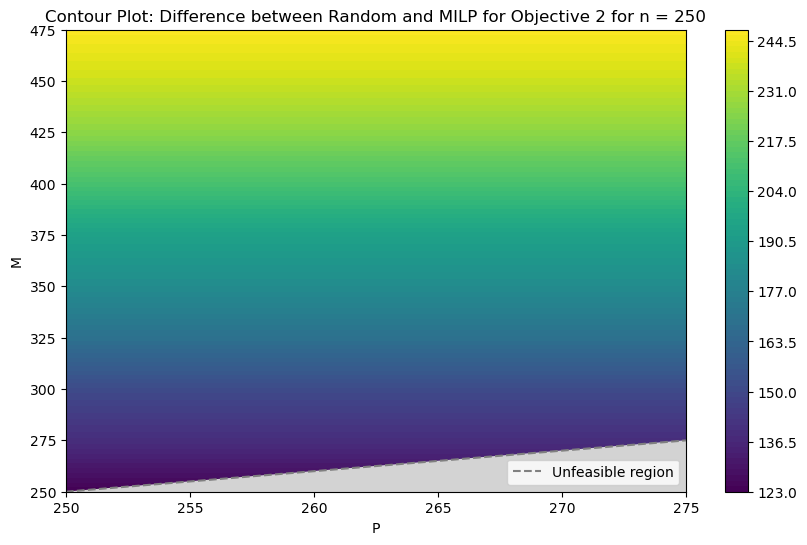

In [204]:
m_values = sorted(list(set(item['m'] for item in data1)))
p_values = sorted(list(set(item['p'] for item in data1)))

difference_2_values = np.empty((len(m_values), len(p_values)))

for i, m in enumerate(m_values):
    for j, p in enumerate(p_values):
        matching_items = [item for item in data1 if item['m'] == m and item['p'] == p]
        if matching_items:
            difference_2_values[i, j] = matching_items[0]['difference_ 2']
        else:
            difference_2_values[i, j] = np.nan
            
# Plotting preparation
p, m = np.meshgrid(p_values, m_values)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(p, m, difference_2_values,  levels=100)
plt.colorbar(contour)
plt.fill_between(p_values, p_values, np.min(m_values), color='lightgray')
plt.plot(p_values, p_values, color='gray', linestyle='--', label = "Unfeasible region")
plt.colorbar()
plt.xlabel('P')
plt.ylabel('M')
plt.legend(loc='lower right')
plt.title('Contour Plot: Difference between Random and MILP for Objective 2 for n = 250')
plt.show()

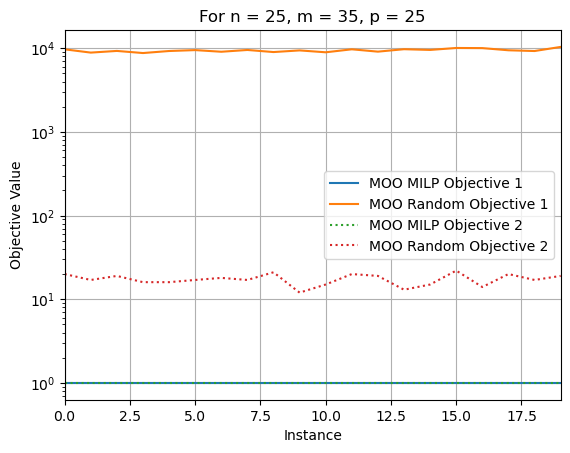

In [172]:
num_instances = 20
n = 25
m = 35
p = 25
seed = 0

moo_milp_objectives1 = []
moo_milp_objectives2 = []

moo_random_objectives1 = []
moo_random_objectives2 = []

for i in range(num_instances):
    MOO_milp_objs, MOO_rand_objs = MOO_MILP(n, m, p, False, seed + i)
    
    moo_milp_objectives1.append(MOO_milp_objs[0])
    moo_milp_objectives2.append(MOO_milp_objs[1])
    moo_random_objectives1.append(MOO_rand_objs[0])
    moo_random_objectives2.append(MOO_rand_objs[1])
    

plt.title("For n = 25, m = 35, p = 25")
plt.plot(moo_milp_objectives1, label = 'MOO MILP Objective 1')

plt.plot(moo_random_objectives1, label = "MOO Random Objective 1")

plt.plot(moo_milp_objectives2, label = 'MOO MILP Objective 2', linestyle = 'dotted')

plt.plot(moo_random_objectives2, label = "MOO Random Objective 2", linestyle = 'dotted')

plt.xlabel("Instance")
plt.ylabel("Objective Value")
plt.xlim(0, num_instances - 1)
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.legend()
plt.grid()

In [23]:
import cvxpy as cp

# Define the decision variables
x = cp.Variable((n, p), boolean=True)
a = cp.Variable(m, boolean=True)

# Define the objective function
objective = cp.sum(cp.multiply(t, x))

# Define the constraints
constraints = [
    cp.sum(x, axis=1) == 1,  # Each patient is assigned to exactly one ambulance
    cp.sum(x, axis=0) <= a,  # Ambulance location constraint
    cp.sum(a) <= p  # Number of chosen ambulance locations should not exceed p
]

# Define the problem
problem = cp.Problem(cp.Minimize(objective), constraints)

# Solve the problem
problem.solve()

# Print the solution status
print("Status:", problem.status)

# Print the optimal objective value
print("Objective Value:", problem.value)

# Print the optimal solution
print("Optimal Solution:")
print("x =", x.value)
print("a =", a.value)

Status: optimal
Objective Value: 36.0
Optimal Solution:
x = [[ 0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -0.  1.]]
a = [1. 1. 1. 1. 1. 1.]
